In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Hannanum, Kkma, Komoran, Okt, Mecab

mec = Mecab()
okt = Okt()
kkm = Kkma()
kom = Komoran()
han = Hannanum()

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="nlp/data/naver_movie_review/ratings_train.txt")

('nlp/data/naver_movie_review/ratings_train.txt',
 <http.client.HTTPMessage at 0x7f6b10080e50>)

In [3]:
train_data = pd.read_table('nlp/data/naver_movie_review/ratings_train.txt')

In [4]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력

훈련용 리뷰 개수 : 150000


In [5]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

Text(0, 0.5, 'total seconds')

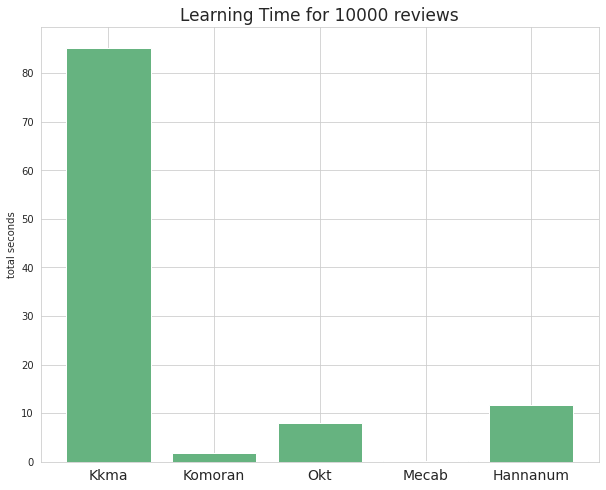

In [6]:
# 
def tagger_time(tagger, texts):
    time_sum = 0
    print(tagger)
    for sentence in tqdm(texts):
        t1 = time.time()
        try:
            tagger.morphs(sentence)
        except:
            pass
        
        t2 = time.time()
        
        time_sum += (t2 - t1)
        
    return time_sum

texts = train_data['document'][:5000]
time_list = []

for tagger in [kkm, kom, okt, mec, han]:
    time_list.append(tagger_time(tagger, texts))

    
sns.set_style('whitegrid')

tagger = ['Kkma', 'Komoran', 'Okt', 'Mecab', 'Hannanum']

plt.figure(figsize=(10,8))
plt.bar(tagger, time_list, color=(0.4,0.7,0.5))
plt.title('Learning Time for 10000 reviews', fontsize=17)
plt.xticks(fontsize=14)
plt.ylabel('total seconds')

In [7]:
print(kkm.pos('아버지가방에들어가신다'))

[('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN')]


In [8]:
print(kom.pos('아버지가방에들어가신다'))

[('아버지', 'NNG'), ('가방', 'NNP'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')]


In [9]:
print(okt.pos('아버지가방에들어가신다'))

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]


In [10]:
print(mec.pos('아버지가방에들어가신다'))

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('신다', 'EP+EC')]


In [11]:
print(han.pos('아버지가방에들어가신다'))

[('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E')]
